<a href="https://colab.research.google.com/github/akapo/class-llm/blob/main/chapter4/multi_modal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **실습 환경 설정**

In [1]:
!pip install -qU openai
!pip install -qU langchain langchain-openai langchain-community langchainhub langchain-experimental langgraph
!pip install -qU huggingface_hub langchain-google-genai langchain-anthropic
!pip install -qU python-dotenv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 337.0/337.0 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 990.3/990.3 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.2/374.2 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.

In [4]:
#!pip install python-dotenv
import dotenv
dotenv.load_dotenv()

import os
GOOGLE_API_KEY = os.getenv('GOOGLE_API_KEY')
OPENAI_API_KEY = os.getenv('OPENAI_API_KEY')
ANTHROPIC_API_KEY = os.getenv('ANTHROPIC_API_KEY')

# 주의: API_KEY를 깃허브에 노출하면 LLM 업체는 해당키를 즉시 삭제함.
print("GOOGLE_API_KEY: " + GOOGLE_API_KEY[:20])
print("OPENAI_API_KEY: " + OPENAI_API_KEY[:20])
print("ANTHROPIC_API_KEY: " + ANTHROPIC_API_KEY[:20])

GOOGLE_API_KEY: AIzaSyCCtFS9bml5jdGI
OPENAI_API_KEY: sk-proj-FEDi6Ge6iQyR
ANTHROPIC_API_KEY: sk-ant-api03-YcGqyQQ


# **멀티모달(Multi-modal)**

## **1) OpenAI Whisper**

**전사(transcription) 예제1** (텍스트로 받아쓰기)

In [5]:
# 전사(transcription) - 텍스트로 받아쓰기
# 자동 음성인식(ASR: Automatic Speech Recognition) 이라고도 함
from openai import OpenAI
import dotenv
dotenv.load_dotenv()
client = OpenAI()

file = open("./data/SBS 8 News c1.mp3", "rb")
transcript = client.audio.transcriptions.create(
    model="whisper-1",
    file=file
)
print(transcript.text) # 결과를 표시

최근 한 드라마를 통해서 큰 인기를 얻은 배우 변우석 씨가 사설 경호원들의 지나친 행동 때문에 논란에 휩싸였습니다. 며칠 전 인천공항에서 규정을 무시한 과잉 경호로 다른 사람들에게 피해를 준 겁니다. 경찰은 문제를 일으킨 경호원들에 대해서 조사에 착수했습니다. 정혜진 기자가 취재했습니다. --지난 12일 배우 변우석 씨의 인천국제공항 출국 현장. 소속사가 고용한 사설 경호업체 직원이 대기 중이던 취재진에게 공항 출입문 통제 계획을 밝힙니다. 실제 경호원들은 변 씨가 들어간 뒤 출국장 게이트를 10분 동안 임의로 막았고 출국장 내에서는 촬영을 막겠다며 공항 이용객들에게 플래시를 쐈습니다. 변 씨가 4층 대한항공 라운지에 들어서자 경호업체 직원들이 라운지로 향하는 다른 탑승객들의 여권과 항공권까지 검사했습니다. 경찰 불신 검문도 경찰관이 신분증을 제시하고 목적을 밝힌 뒤 이뤄지는데 아무런 법적 권한도 없는 사설 경호업체가 탑승객의 여권 등을 검사한 건 불법이라는 지적입니다. -. -. -. 여권 검사 등 도넘은 경호 활동은 인천공항공사와도 사전협의되지 않은 걸로 확인됐습니다. 한 시민은 과잉경호로 인권을 침해당했다며 국가인권위원회에 제소했습니다. 소속사는 도의적 책임을 언급하며 사과했지만 오늘 귀국한 변 씨는 별도 입장은 내놓지 않았습니다. 대신 과잉경호 논란을 의식한 듯 오늘은 경호를 최소화한 채 공항을 빠져나갔습니다. 인천공항경찰단은 경호업체 직원 6명에 대해 형법상 업무 방해죄와 강요죄 적용 여지가 있는지 입건 전 조사, 즉 내사에 착수했습니다. SBS 정혜진입니다. 


**전사(transcription) 예제2** (출력형식 변경)

In [7]:
# 전사(transcription) - 출력형식 변경
from openai import OpenAI
import dotenv
dotenv.load_dotenv()
client = OpenAI()

file = open("./data/SBS 8 News c1.mp3", "rb")
transcript = client.audio.transcriptions.create(
    model="whisper-1",
    file=file,
    response_format="srt"
)
print(transcript) # 결과를 표시

# [response_format]
#- `text` (기본값): 일반 텍스트 형식으로 출력.
#- `json`: JSON 형식으로 출력.
#- `srt`: SubRip Subtitle (SRT) 형식으로 출력.
#- `vtt`: WebVTT (Web Video Text Tracks) 형식

1
00:00:00,000 --> 00:00:03,240
최근 한 드라마를 통해서 큰 인기를 얻은

2
00:00:03,500 --> 00:00:09,000
배우 변우석 씨가 사설 경호원들의 지나친 행동 때문에 논란에 휩싸였습니다.

3
00:00:09,540 --> 00:00:12,280
며칠 전 인천공항에서 규정을 무시한 과잉

4
00:00:12,580 --> 00:00:14,840
경호로 다른 사람들에게 피해를 준 겁니다.

5
00:00:15,140 --> 00:00:18,780
경찰은 문제를 일으킨 경호원들에 대해서 조사에 착수했습니다.

6
00:00:19,080 --> 00:00:20,520
정혜진 기자가 취재했습니다.

7
00:00:23,219 --> 00:00:28,719
--지난 12일 배우 변우석 씨의 인천국제공항 출국 현장.

8
00:00:28,820 --> 00:00:31,320
소속사가 고용한 사설 경호업체 직원이

9
00:00:31,580 --> 00:00:35,080
대기 중이던 취재진에게 공항 출입문 통제 계획을 밝힙니다.

10
00:00:40,360 --> 00:00:43,259
실제 경호원들은 변 씨가 들어간 뒤 출국장

11
00:00:43,560 --> 00:00:46,160
게이트를 10분 동안 임의로 막았고 출국장

12
00:00:46,459 --> 00:00:51,959
내에서는 촬영을 막겠다며 공항 이용객들에게 플래시를 쐈습니다.

13
00:00:52,240 --> 00:00:54,639
변 씨가 4층 대한항공 라운지에 들어서자

14
00:00:54,759 --> 00:00:59,259
경호업체 직원들이 라운지로 향하는 다른 탑승객들의 여권과 항공권까지

15
00:00:59,639 --> 00:01:04,139
검사했습니다. 경찰 불신 검문도 경찰관이 신분증을

16
00:01:04,440 --> 00:01:09,940
제시하고 목적을 밝힌 뒤 이뤄지는데 아무런 법적 권한도 없는 사설 경호업체가

1

**전사(transcription) 예제3** (srt 자막파일 형식으로 저장하기)

In [ ]:
from openai import OpenAI
import dotenv
dotenv.load_dotenv()
client = OpenAI()

file = open("./data/SBS 8 News c1.mp3", "rb")
transcript = client.audio.transcriptions.create(
    model="whisper-1",
    file=file,
    response_format="srt"
)

srt_file_path = "./data/SBS 8 News c1.srt"
with open(srt_file_path, "w", encoding="utf-8") as srt_file:
    srt_file.write(transcript)

**음성(대화) 요약하기**

In [ ]:
from openai import OpenAI
import dotenv
dotenv.load_dotenv()
client = OpenAI()

file = open("./data/SBS 8 News c1.mp3", "rb")
transcript = client.audio.transcriptions.create(
    model="whisper-1",
    file=file,
)

from langchain_openai import ChatOpenAI
llm = ChatOpenAI(
	model_name='gpt-4o-mini', temperature=0,
)

messages = [
    ("system", "당신을 신문기사를 작성하는 기자입니다."),
    ("human", f"다음 뉴스 내용을 4문장으로 요약해주세요\n{transcript}"),
]

print(llm.invoke(messages).content)

**음성(대화) 영어로 번역**

In [10]:
from openai import OpenAI
import dotenv
dotenv.load_dotenv()

file = open("./data/SBS 8 News c1.mp3", "rb")
transcript = client.audio.translations.create(
    model="whisper-1",
    file=file,
)

print(transcript.text) # 결과를 표시

Translation(text="Actor Byun Woo-suk, who recently gained great popularity through a drama, was controversial because of the excessive behavior of private bodyguards. A few days ago, at Incheon Airport, he was harassed by other people for ignoring the regulations. The police investigated the bodyguards who caused the problem. Jung Hye-jin reported. On the 12th, actor Byun Woo-suk's Incheon International Airport departure scene. An employee of a private bodyguard company hired by the agency announced a plan to control the entrance to the airport to reporters who were waiting. Actors, if you go in, you can't enter the gate. I'm going to block the gate. In fact, the bodyguards blocked the exit gate for 10 minutes after Byun went in. He shot a flash to the airport users, saying he would stop filming inside the exit gate. When Byun entered the 4th floor Korean Air Lounge, the bodyguards checked the passports and flight tickets of other passengers heading to the lounge. The inspection of pol

**응용 도전1: 한국어 영상에 영어자막 만들기**

In [84]:
# 전사(transcription) 예제2 + 예제3 활용
from openai import OpenAI
import dotenv
dotenv.load_dotenv()
client = OpenAI()

file = open("./data/SBS 8 News c1.mp3", "rb")
transcript = client.audio.translations.create(
    model="whisper-1",
    file=file,
    response_format="srt"
)

srt_file_path = "./data/SBS 8 News c1.srt"
with open(srt_file_path, "w", encoding="utf-8") as srt_file:
    srt_file.write(transcript)

**응용 도전2: 한국어 영상에 일본어 자막 생성하기**

In [ ]:
# 전사(transcription) 예제2 + 예제3 + 영어로 번역 응용
from openai import OpenAI
client = OpenAI()
import dotenv
dotenv.load_dotenv()

file = open("./data/SBS 8 News c1.mp3", "rb")
transcript = client.audio.transcriptions.create(
    model="whisper-1",
    file=file,
    response_format="srt"
)

from langchain_openai import ChatOpenAI
llm = ChatOpenAI(
	model_name='gpt-4o', temperature=0,
)

messages = [
    ("system", "당신은 한국어 자막을 일본어 자막으로 번역하는 전문 번역가 입니다."),
    ("human", f"다음 srt 파일 내용을 번역한 결과물을 출력하세요\n{transcript}"),
]
trans_text = llm.invoke(messages).content

srt_file_path = "./data/SBS 8 News c1.srt"
with open(srt_file_path, "w", encoding="utf-8") as srt_file:
    srt_file.write(trans_text)

**응용 도전3: 일본어 영상에 한글자막 생성하기**

In [ ]:
from openai import OpenAI
client = OpenAI()

from langchain.callbacks.streaming_stdout import StreamingStdOutCallbackHandler
import dotenv
dotenv.load_dotenv()

file = open("./data/【１分で解説】海遊館　(観光地紹介-大阪-旅行-デート-おすすめ-見どころ-料金-アクセス).m4a", "rb")
transcript = client.audio.translations.create(
    model="whisper-1",
    file=file,
    response_format="srt"
)

from langchain_openai import ChatOpenAI
llm = ChatOpenAI(
	model_name='gpt-4o', temperature=0, streaming=True,
    callbacks=[StreamingStdOutCallbackHandler()])

messages = [
    ("system", "당신은 영어 자막을 한국어 자막으로 번역하는 전문 번역가 입니다."),
    ("human", f"다음 srt 파일 내용을 번역한 결과물을 출력하세요\n```srt\n{transcript}\n```"),
]
trans_text = llm.invoke(messages).content
lines = trans_text.splitlines(True)   # 문자열 리스트로 반환
rest_line = lines[1:-1]   # 첫번째줄, 마지막줄 제거
trans_text = ''.join(rest_line)  # 리스트를 다시 문자열로 합치기

srt_file_path = "./data/【１分で解説】海遊館　(観光地紹介-大阪-旅行-デート-おすすめ-見どころ-料金-アクセス).srt"
with open(srt_file_path, "w", encoding="utf-8") as srt_file:
    srt_file.write(trans_text)

## **2) Image Describe**

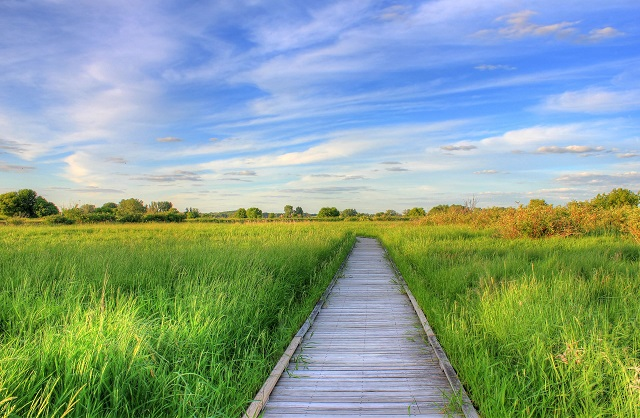  
**image_url 전달 방식**

In [14]:
# image url 직접전달 방식으로 인코딩하여 LLM에 전달
import base64
import httpx
import dotenv
import pprint
dotenv.load_dotenv()

from langchain_core.messages import HumanMessage
from langchain_openai import ChatOpenAI
from langchain_anthropic import ChatAnthropic
from langchain_google_genai import ChatGoogleGenerativeAI

gpt = ChatOpenAI(model="gpt-4o")
gemini = ChatGoogleGenerativeAI(model="gemini-1.5-pro")
claude = ChatAnthropic(model="claude-3-5-sonnet-20240620")

image_url = "https://datahub.pe.kr/m/wisconsin-madison-the-nature-boardwalk.jpg"
image_data = base64.b64encode(httpx.get(image_url).content).decode("utf-8")

message = HumanMessage(
    content=[
        {"type": "text", "text": "이 이미지의 날씨를 설명해주세요"},
        {
            "type": "image_url",
            "image_url": {"url": f"data:image/jpeg;base64,{image_data}"},
        },
    ],
)

#response = claude.invoke([message])   # Error: Claude는 url 직접전달 불가
#pprint.pp('\n[Claude-3.5-sonnet]\n'+ response.content, width=100)
response = gpt.invoke([message])
pprint.pp('\n[GPT-4o]\n'+ response.content, width=100)
response = gemini.invoke([message])
pprint.pp('\n[Gemini-1.5-pro]\n'+ response.content, width=100)

('\n'
 '[GPT-4o]\n'
 '이 이미지의 날씨는 맑은 날씨로 보입니다. 하늘이 푸르고, 몇 개의 흰 구름이 떠 있습니다. 태양이 강하게 비치고 있는 듯하며, 주변의 초록색 잔디와 식물들이 잘 자라고 '
 '있습니다. 전반적으로 따뜻하고 맑은 날씨로 보입니다.')
('\n'
 '[Gemini-1.5-pro]\n'
 '이미지는 푸른 하늘에 흩어져 있는 흰색 구름과 함께 화창하고 맑은 날을 보여줍니다. 햇살이 밝게 비추고 있으며, 풀이 무성하고 푸르게 변하여 기온이 따뜻함을 시사합니다. '
 '전반적으로 이 이미지는 쾌적하고 화창한 날씨를 암시합니다.')


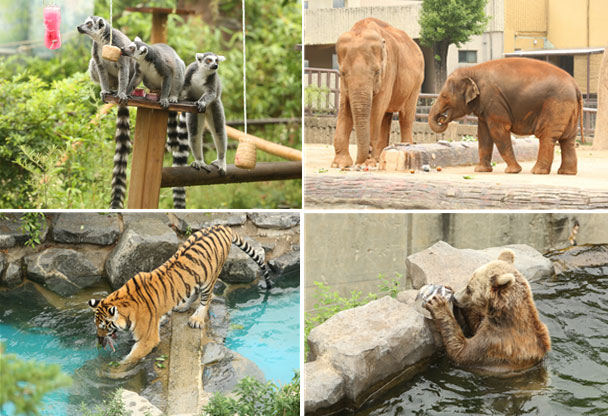  
**base64 인코딩 방식**

In [16]:
# 이미지를 base64 방식으로 인코딩하여 LLM에 전달
import base64
import dotenv
dotenv.load_dotenv()

from langchain_core.messages import HumanMessage
from langchain_openai import ChatOpenAI
from langchain_anthropic import ChatAnthropic
from langchain_google_genai import ChatGoogleGenerativeAI

gpt = ChatOpenAI(model="gpt-4o")
gemini = ChatGoogleGenerativeAI(model="gemini-1.5-pro")
claude = ChatAnthropic(model="claude-3-5-sonnet-20240620")

def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        image_data = base64.b64encode(image_file.read()).decode("utf-8")

    return image_data

image_url = "https://cdn.newspenguin.com/news/photo/201907/652_1040_4258.jpg"
image_data = base64.b64encode(httpx.get(image_url).content).decode("utf-8")

message = HumanMessage(
    content=[
        {"type": "text", "text": "이 이미지에서 당신이 파악한 모든 것에 대해 알려줘요."},
        {
            "type": "image_url",
            "image_url": {"url": f"data:image/jpeg;base64,{image_data}"
            },
        },
    ],
)

response = claude.invoke([message])
print('\n[Claude-3.5-sonnet]\n'+ response.content)
response = gpt.invoke([message])
print('\n[GPT-4o]\n'+ response.content)
response = gemini.invoke([message])
print('\n[Gemini-1.5-pro]\n'+ response.content)


[Claude-3.5-sonnet]
이 이미지는 4개의 다른 동물원 장면을 보여주는 사진 콜라주입니다:

1. 왼쪽 상단: 나무 구조물 위에 앉아있는 여러 마리의 여우원숭이(또는 레머)들이 보입니다. 그들의 특징적인 긴 줄무늬 꼬리가 잘 보입니다.

2. 오른쪽 상단: 두 마리의 코끼리가 있는 장면입니다. 한 마리는 성체이고 다른 한 마리는 더 작은 새끼 코끼리로 보입니다. 그들은 울타리가 있는 공간에 서 있습니다.

3. 왼쪽 하단: 호랑이 한 마리가 물가에 서 있습니다. 호랑이는 물에 발을 담그고 있는 것처럼 보이며, 주변에는 바위들이 있습니다.

4. 오른쪽 하단: 갈색 곰으로 보이는 동물이 물에서 휴식을 취하고 있습니다. 곰은 바위 위에 기대어 앉아 있고, 물에 반쯤 잠겨 있습니다.

이 이미지들은 모두 동물원이나 야생동물 보호구역에서 촬영된 것으로 보입니다. 각 장면은 다양한 동물들의 서식지와 행동을 보여주고 있습니다.

[GPT-4o]
이 이미지는 동물원에서 촬영된 것으로 보이며, 네 개의 다른 동물들이 각각 다른 구역에서 생활하는 모습을 담고 있습니다.

1. 왼쪽 상단: 나무 구조물 위에 여러 마리의 여우원숭이(링테일 레무르)들이 앉아 있습니다. 이들은 나무를 오르내리며 활동하는 모습을 보여줍니다.

2. 오른쪽 상단: 두 마리의 코끼리가 평평한 바닥에서 먹이를 먹고 있는 모습입니다. 배경에는 나무와 건물이 보입니다.

3. 왼쪽 하단: 호랑이가 물가 근처에서 걸어다니는 모습입니다. 이 호랑이는 물가를 살펴보며 이동하고 있습니다.

4. 오른쪽 하단: 갈색 곰이 물 속에 들어가 있는 모습입니다. 곰은 물가에 있는 바위에 앞발을 올리고 있습니다.

이 네 가지 동물들은 각각 다른 서식지에서 생활하는데, 동물원에서 그들의 자연스러운 행동을 관찰할 수 있도록 환경이 조성된 것 같습니다.

[Gemini-1.5-pro]
이 이미지는 네 개의 패널로 된 사진 콜라주입니다. 각 패널은 다른 동물이 있는 동물원 인클로저를 보여줍니다.

* **왼쪽 상단 패

**로컬 디스크 이미지 읽기**

In [17]:
from langchain_core.messages import HumanMessage
import base64
import dotenv
dotenv.load_dotenv()

from langchain_openai import ChatOpenAI
from langchain_anthropic import ChatAnthropic
from langchain_google_genai import ChatGoogleGenerativeAI

gpt = ChatOpenAI(model="gpt-4o")
gemini = ChatGoogleGenerativeAI(model="gemini-1.5-pro")
claude = ChatAnthropic(model="claude-3-5-sonnet-20240620")

def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        image_data = base64.b64encode(image_file.read()).decode("utf-8")

    return image_data

image_data = encode_image('./data/seoul_grandpark.jpg')
message = HumanMessage(
    content=[
        {"type": "text", "text": "이 이미지에서 당신이 파악한 모든 것에 대해 알려줘요."},
        {
            "type": "image_url",
            "image_url": {"url": f"data:image/jpeg;base64,{image_data}"
            },
        },
    ],
)

response = claude.invoke([message])
print('\n[Claude-3.5-sonnet]\n'+ response.content)
response = gpt.invoke([message])
print('\n[GPT-4o]\n'+ response.content)
response = gemini.invoke([message])
print('\n[Gemini-1.5-pro]\n'+ response.content)

**두 이미지 비교**  
![517149_405502_3416[1].jpg](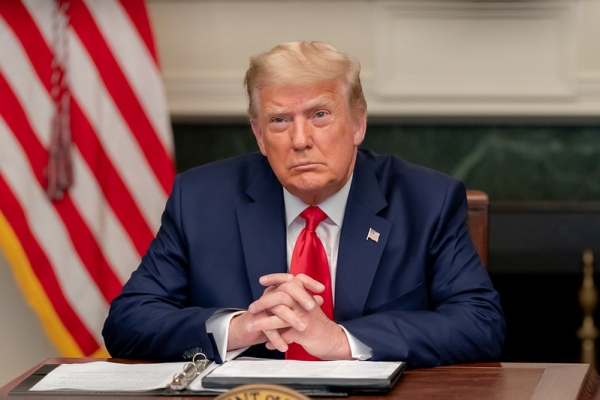)  ![147300_39615_3743[1].jpg](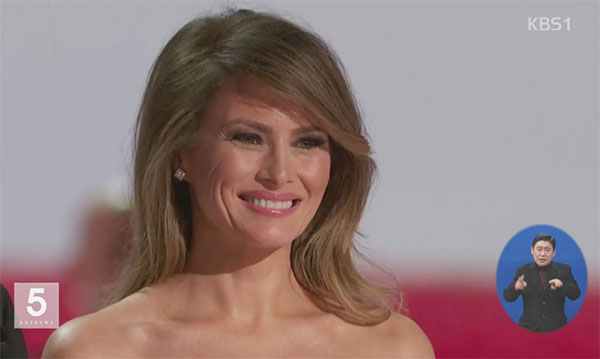)

In [23]:
from langchain_core.messages import HumanMessage
import base64
import httpx
import dotenv
dotenv.load_dotenv()

from langchain_openai import ChatOpenAI
from langchain_anthropic import ChatAnthropic
from langchain_google_genai import ChatGoogleGenerativeAI

gpt = ChatOpenAI(model="gpt-4o-mini", streaming=True)
gemini = ChatGoogleGenerativeAI(model="gemini-1.5-pro")
claude = ChatAnthropic(model="claude-3-5-sonnet-20240620")

image_url_1 = "https://cdn.newsworks.co.kr/news/photo/202101/517149_405502_3416.jpg"
image_url_2 = "https://cdn.newsworks.co.kr/news/photo/201711/147300_39615_3743.jpg"

message = HumanMessage(
    content=[
        {"type": "text", "text": "두 이미지의 누구인지 이름을 말하고, 차이점을 설명하세요."},
        {
          "type": "image_url",
          "image_url": {
            "url": image_url_1,
          },
        },
        {
          "type": "image_url",
          "image_url": {
            "url": image_url_2,
          },
        },
    ],
)

#response = claude.invoke([message])
#print('\n[Claude-3.5-sonnet]\n'+ response.content)
response = gpt.invoke([message])
for chunk in response.content:
    print(chunk, end="")

#print('\n[GPT-4o]\n'+ response.content)
response = gemini.invoke([message])
print('\n\n[Gemini-1.5-pro]\n'+ response.content)

죄송하지만, 해당 이미지에 등장하는 인물의 이름을 말씀드릴 수 없습니다. 그러나 두 이미지의 차이점을 설명해드리겠습니다.

1. **첫 번째 이미지**: 한 남성 인물이 앉아 있는 모습으로, 공식적인 환경에서 촬영된 것으로 보입니다. 배경에는 미국 국기가 보이며, 그는 정장 차림을 하고 있습니다.

2. **두 번째 이미지**: 한 여성 인물이 웃고 있는 모습으로, 공식적인 행사 또는 발표의 일환으로 보입니다. 그녀는 드레스를 입고 있으며, 밝은 표정이 특징입니다.

이 두 이미지는 각각 다른 인물과 상황을 보여주고 있습니다. 첫 번째 이미지는 더 엄숙한 분위기인 반면, 두 번째 이미지는 보다 경쾌하고 긍정적인 느낌을 줍니다.
[Gemini-1.5-pro]
첫 번째 사진은 미국의 45대 대통령인 **도널드 트럼프**입니다. 두 번째 사진은 그의 아내이자 전 영부인인 **멜라니아 트럼프**입니다. 

두 사람의 차이점은 다음과 같습니다:

* **성별:** 도널드 트럼프는 남성이고, 멜라니아 트럼프는 여성입니다.
* **머리카락:** 도널드 트럼프는 금발 머리를 뒤로 넘겼고, 멜라니아 트럼프는 갈색 머리를 길게 기르고 있습니다.
* **옷차림:** 도널드 트럼프는 정장에 빨간 넥타이를 맸고, 멜라니아 트럼프는 검은색 드레스를 입었습니다.
* **표정:** 도널드 트럼프는 심각한 표정을 짓고 있고, 멜라니아 트럼프는 미소를 짓고 있습니다. 

두 사람은 부부이기 때문에 공통점도 있지만, 외모와 표정에서 확연한 차이를 보입니다. 



**시험문제 문제 풀게 하기**

In [80]:
from langchain_core.messages import HumanMessage
from langchain.callbacks.streaming_stdout import StreamingStdOutCallbackHandler
import base64
import dotenv
dotenv.load_dotenv()

from langchain_openai import ChatOpenAI
from langchain_anthropic import ChatAnthropic
from langchain_google_genai import ChatGoogleGenerativeAI

gpt = ChatOpenAI(model="gpt-4o")
gemini = ChatGoogleGenerativeAI(model="gemini-1.5-pro")
claude = ChatAnthropic(model="claude-3-5-sonnet-20240620", streaming=True, callbacks=[StreamingStdOutCallbackHandler()])

def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        image_data = base64.b64encode(image_file.read()).decode("utf-8")

    return image_data

image_data = encode_image('./data/기말고사 화학I 4번.jpg')
message = HumanMessage(
    content=[
        {"type": "text", "text": "문제를 풀고 정답을 구한 뒤, 그것이 답인 이유를 설명하세요."},
        {
            "type": "image_url",
            "image_url": {"url": f"data:image/jpeg;base64,{image_data}"
            },
        },
    ],
)

print('[Gemini-1.5-pro]\n')
response = gemini.stream([message])
for chunk in response:
    print(chunk.content, end="")

print('\n[GPT-4o]\n')
response = gpt.stream([message])
for chunk in response:
    print(chunk.content, end="")

print('\n\n[Claude-3.5-sonnet]\n')
response = claude.invoke([message])


[Gemini-1.5-pro]

정답은 ⑤ 'ㄱ, ㄴ, ㄷ'입니다.

**이유:**

문제는 다양한 용액의 끓는점을 비교하는 실험 과정을 제시하고, 보기에서 옳은 설명을 고르라고 요구합니다. 각 보기를 실험 과정에 대입하여 분석해 보겠습니다.

* **ㄱ. (가)과정 후 두 용액은 증을 이룬다.** 

  (가) 과정은 깨끗한 시험관에 용액을 5mL씩 넣고 증류수가 담긴 비커에 넣어 중탕하는 과정입니다. 중탕은 직접 가열하는 것보다 서서히 온도를 높이는 방법이므로 용액이 끓어서 증기를 발생시킬 가능성이 높습니다. 따라서 ㄱ은 옳은 설명입니다.

* **ㄴ. (나)과정 후 염증은 파란색을 나타낸다.**

  (나) 과정은 (가)의 용액에 염화구리(CuCl2)를 넣는 과정입니다. 염화구리는 수용액 상태에서 파란색을 띠므로 ㄴ은 옳은 설명입니다.

* **ㄷ. (다)과정 후 아래쪽은 보라색을 나타낸다.**

  (다) 과정은 (나)의 용액에 아이오딘(I2)을 넣는 과정입니다. 아이오딘은 녹말과 반응하여 보라색을 나타냅니다. 중탕 과정에서 물에 녹말 성분이 녹아 나왔을 가능성이 있고, 아이오딘이 아래쪽에 가라앉으면서 녹말과 반응하여 보라색을 띨 수 있습니다. 따라서 ㄷ도 옳은 설명입니다.

**결론적으로, ㄱ, ㄴ, ㄷ 모두 실험 과정과 일치하는 설명이므로 정답은 ⑤ 'ㄱ, ㄴ, ㄷ'입니다.** 

[GPT-4o]

이 실험은 분자의 극성과 용해성에 관한 것입니다. 각 단계에서 일어나는 현상을 통해 어떤 분자가 어떤 용매에 용해되는지를 이해할 수 있습니다.

### 문제 설명
1. (가) 과정: 유리병에 헥세인과 물을 각각 넣고 흔듭니다.
   - 헥세인과 물은 서로 섞이지 않기 때문에 층을 이룹니다.
   - 헥세인은 비극성 용매이고, 물은 극성 용매입니다.
   - 따라서, 선택지 중 (가) 과정 후 두 용액은 층을 이룬다는 선택지 ㄱ은 옳습니다.

2. (나) 과정: 염화구리(II) (CuCl₂)를 넣고 흔듭니다.
   - CuCl₂는 극성 분자이기 때문에 물에

In [82]:
from langchain_core.messages import HumanMessage
from langchain.callbacks.streaming_stdout import StreamingStdOutCallbackHandler
import base64
import dotenv
dotenv.load_dotenv()

from langchain_openai import ChatOpenAI
from langchain_anthropic import ChatAnthropic
from langchain_google_genai import ChatGoogleGenerativeAI

gpt = ChatOpenAI(model="gpt-4o")
gemini = ChatGoogleGenerativeAI(model="gemini-1.5-pro")
claude = ChatAnthropic(model="claude-3-5-sonnet-20240620", streaming=True, callbacks=[StreamingStdOutCallbackHandler()])

def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        image_data = base64.b64encode(image_file.read()).decode("utf-8")

    return image_data

image_data = encode_image('./data/기말고사 2학년 중국어I page-1.jpg')
message = HumanMessage(
    content=[
        {"type": "text", "text": "모든 문제를 풀고 정답을 구한 뒤, 그것이 답인 이유를 설명하세요."},
        {
            "type": "image_url",
            "image_url": {"url": f"data:image/jpeg;base64,{image_data}"
            },
        },
    ],
)

print('[Gemini-1.5-pro]\n')
response = gemini.stream([message])
for chunk in response:
    print(chunk.content, end="")

print('\n[GPT-4o]\n')
response = gpt.stream([message])
for chunk in response:
    print(chunk.content, end="")

print('\n\n[Claude-3.5-sonnet]\n')
response = claude.invoke([message])

[Gemini-1.5-pro]

## 모든 문제 풀이 및 정답 설명

**1.  ** 그림에 들어갈 알맞은 것은? **[3점]**

* 질문:  A: Nǐ xǐhuan chī shénme? (너는 무엇을 먹는 것을 좋아하니?) 
* 질문:  B: Wǒ xǐhuan chī _______. (나는 _____ 먹는 것을 좋아해.)

* 보기:
    ①  zhǎjiāngmiàn
    ②  zhájiàngmiàn
    ③  **zhajiangmian** 
    ④  zhājiāngmiàn
    ⑤  zhājiǎngmiàn

**정답:** ③ zhajiangmian

**설명:** 그림은 중국 요리 중 하나인 '짜장면'을 나타내고 있습니다. 중국어로 짜장면은 'zhajiangmian'이라고 합니다. 따라서 정답은 ③번입니다.

**2. 그림의 발음 기호 중 두 개를 조합하여 만들 수 있는 발음에 해당하는 글자의 의미는? [3.1점]**

* 그림: 첫 번째 그림 'r', 두 번째 그림 'f', 세 번째 그림 'u', 네 번째 그림 'ēng'

* 보기:
    ① 꽃
    ② 새
    ③ 바람
    ④ 사람
    ⑤ 하늘

**정답:** ⑤ 하늘

**설명:**  두 번째 그림 'f' 와 세 번째 그림 'u' 를 조합하면 'fū' 가 되고, 이는 중국어로 '하늘'을 의미합니다. 따라서 정답은 ⑤번입니다.

**3. 그림과 같은 것은 <보기>에서 고른 것은? [3.5점]**

* 그림: 숫자 '3'을 나타내는 손가락 모양.

* 보기:
    a. 엄지손가락을 편 모양
    b. 주먹을 쥔 모양
    c. 엄지와 검지를 펴고 나머지 손가락을 접은 모양
    d. 엄지, 검지, 새끼손가락을 펴고 나머지 손가락을 접은 모양

* 선택지:
    ① a, b
    ② **a, c**
    ③ b, c
    ④ b, d
    ⑤ c, d

**정답:** ② a, c

**설명:** 중국에서 숫자 '3'을  손가락으로 표현할 때는 엄지손가락(a)과 엄지

## 3) Dall-E image generator

**이미지 생성 (Dall-E 3)**

Generated image URL: https://oaidalleapiprodscus.blob.core.windows.net/private/org-rmBegPpl5COVdjil5nRmit6b/user-audnaU74P6xgydXm2HxYA1Rc/img-UXjPMp5Ga3SPxCMOrs8ftnpW.png?st=2024-07-26T13%3A41%3A52Z&se=2024-07-26T15%3A41%3A52Z&sp=r&sv=2023-11-03&sr=b&rscd=inline&rsct=image/png&skoid=6aaadede-4fb3-4698-a8f6-684d7786b067&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2024-07-25T23%3A31%3A43Z&ske=2024-07-26T23%3A31%3A43Z&sks=b&skv=2023-11-03&sig=xR/%2BB00wdbU6gb75uw2Sm/guWSKfej/K%2BaywJVj8i%2Bs%3D


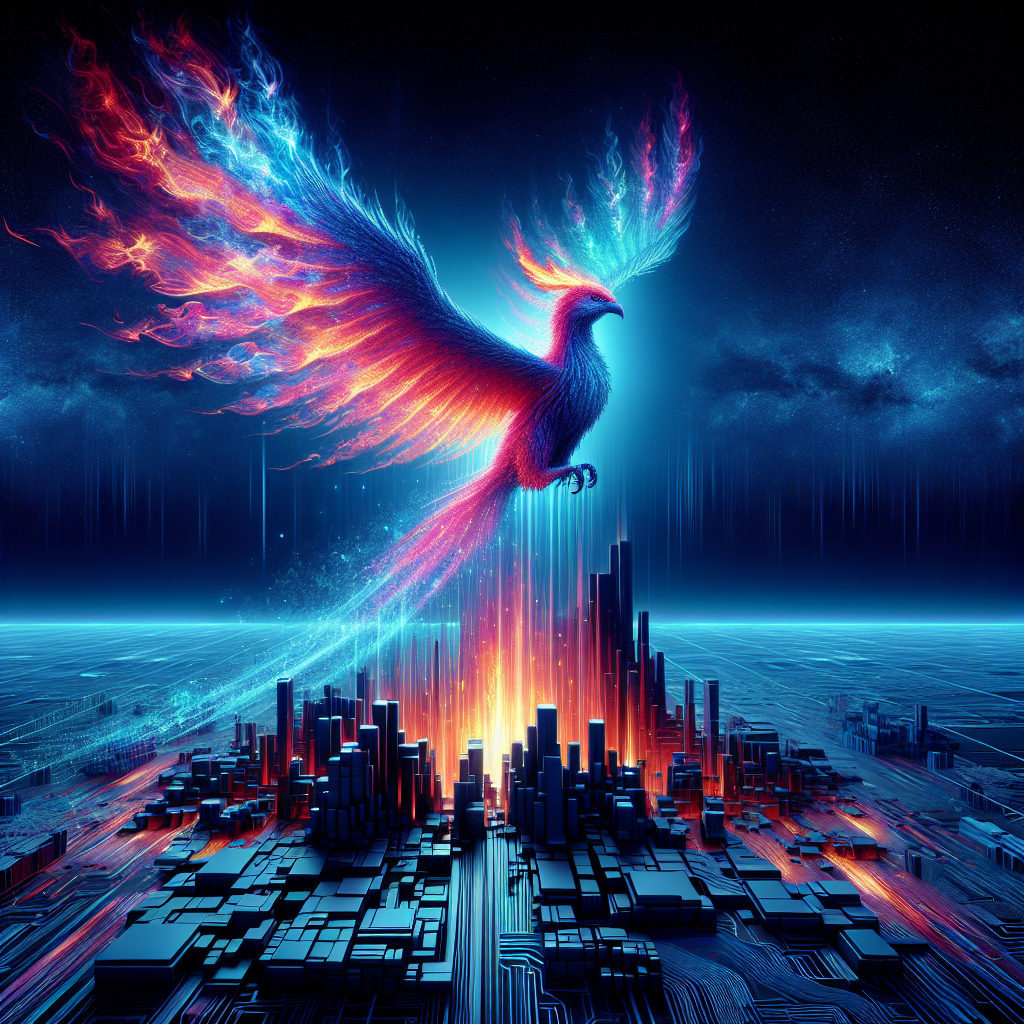

In [78]:
import dotenv
dotenv.load_dotenv()

import cv2
import numpy as np
import urllib.request
from PIL import Image
from openai import OpenAI

def show_image(image_url):
    img = np.array(Image.open(urllib.request.urlopen(image_url)))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    cv2_imshow(img)

def generate_image(prompt):
    client = OpenAI()
    response = client.images.generate(
        model="dall-e-3",
        prompt=prompt,
        size="1024x1024",
        quality="standard",
        n=1,
    )
    return response.data[0].url

#image_url = generate_image("a white siamese cat")
image_url = generate_image("A majestic phoenix reborn from digital ashes in a blaze of holographic flames")
print(f"Generated image URL: {image_url}")
show_image(image_url)

**이미지 변형** (DALL·E 2만 해당)

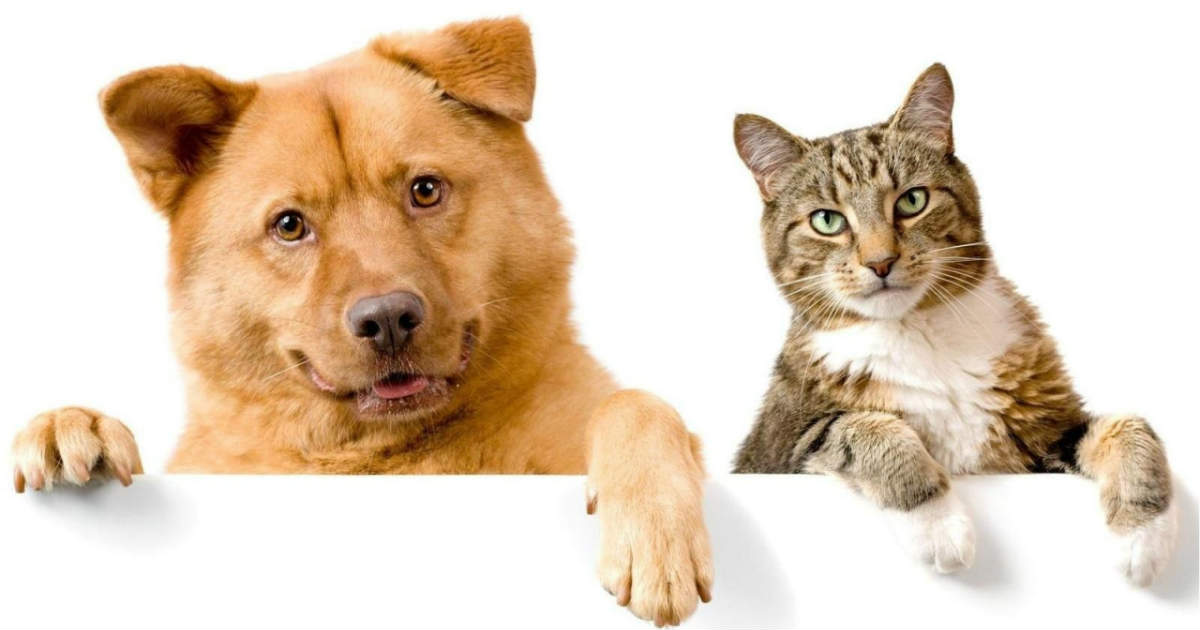

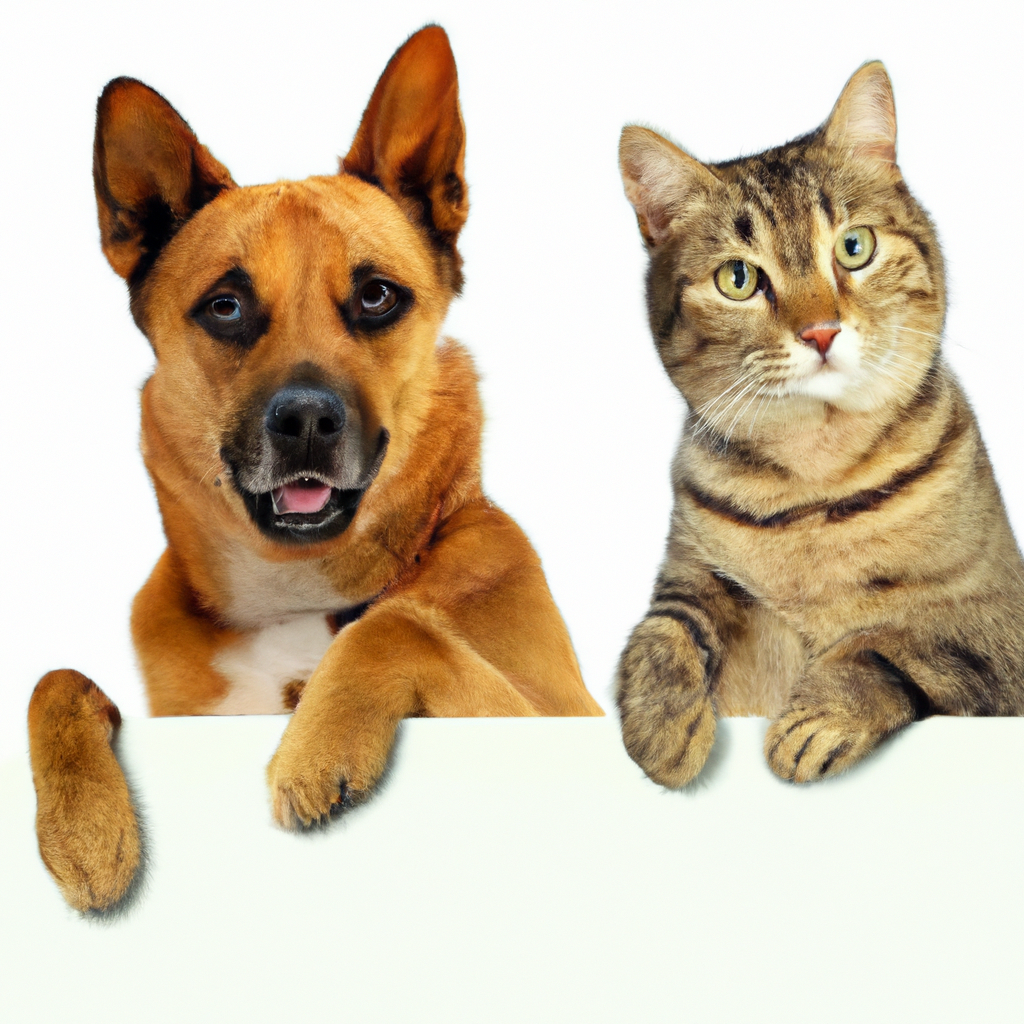

In [77]:
import cv2
from openai import OpenAI
client = OpenAI()

def show_image(image_url):
    img = np.array(Image.open(urllib.request.urlopen(image_url)))
    plt.imshow(img)

print('[Original image]\n')
img = cv2.imread("./data/dog and cat.png")
cv2_imshow(img)

response = client.images.create_variation(
  model="dall-e-2",
  image=open("./data/dog and cat.png", "rb"),
  n=1,
)
image_url = response.data[0].url

print('\n[Variation image]\n')
img = np.array(Image.open(urllib.request.urlopen(image_url)))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(img)

**이미지 편집** (DALL·E 2만 해당)  
"인페인팅"이라고도 알려진 이미지 편집 엔드포인트를 사용하면 이미지를 업로드하고 어떤 영역을 대체해야 하는지 나타내는 마스크를 사용하여 이미지를 편집하거나 확장할 수 있습니다. 마스크의 투명한 영역은 이미지를 편집해야 하는 위치를 나타내며, 프롬프트는 지워진 영역만이 아니라 전체 새 이미지를 설명해야 합니다 .

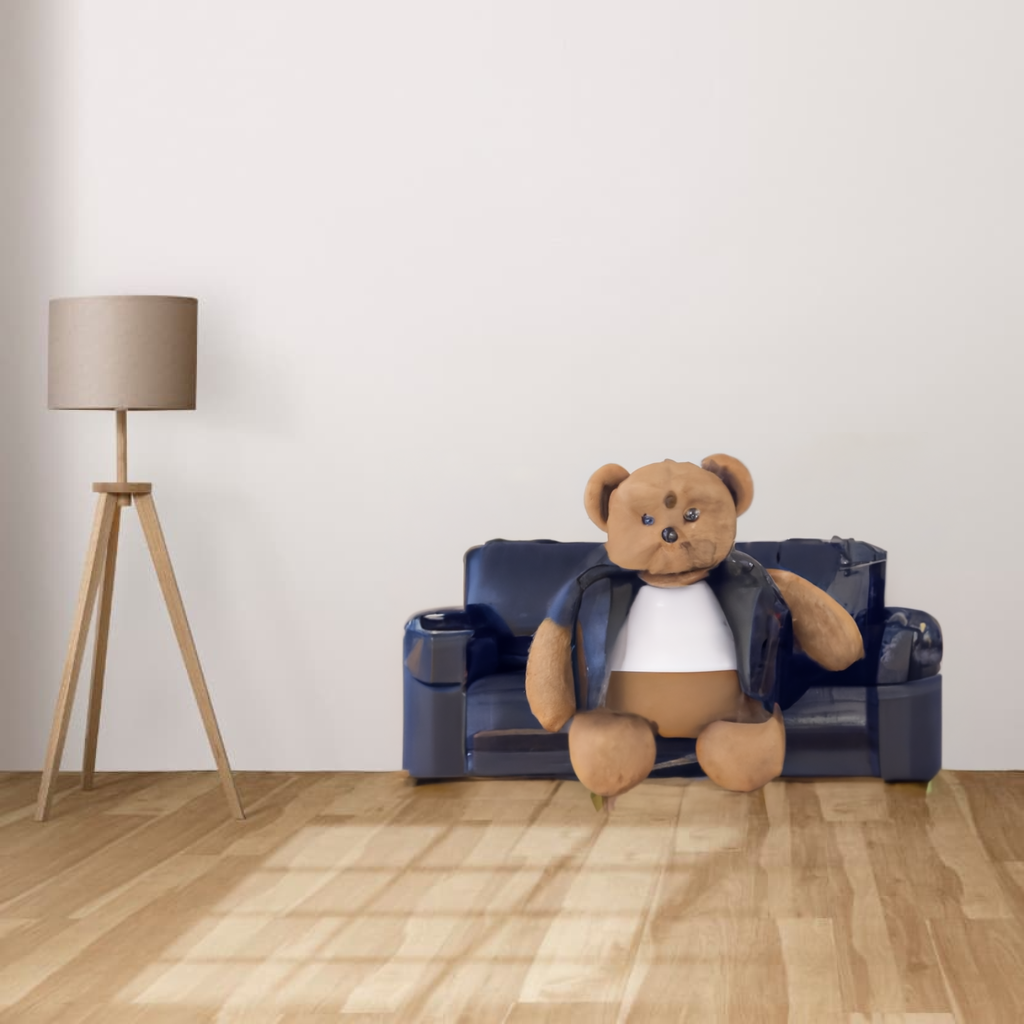

In [93]:
import cv2
from openai import OpenAI
client = OpenAI()

response = client.images.edit(
  model="dall-e-2",
  image=open("./data/image_edit_original.png", "rb"),
  mask=open("./data/image_edit_mask.png", "rb"),
  prompt="a Teddy bear sitting on the sofa bed",     # 영어만 이해함.
  n=1,
)
image_url = response.data[0].url

img = np.array(Image.open(urllib.request.urlopen(image_url)))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(img)